# Restaurant Location Recommendation Using Neighborhood Clustering

Delhi officially known as the National Capital Territory of Delhi (NCT), is a city and a union territory of India containing New Delhi, the capital of India. It is bordered by the state of Haryana on three sides and by Uttar Pradesh to the east. The NCT covers an area of 1,484 square kilometres (573 sq mi).According to the 2011 census, Delhi's city proper population was over 11 million,the second-highest in India after Mumbai,while the whole NCT's population was about 16.8 million.Delhi's urban area is now considered to extend beyond the NCT boundaries, and include the neighbouring satellite cities of Ghaziabad, Faridabad, Gurgaon and Noida in an area called the National Capital Region (NCR) and had an estimated 2016 population of over 26 million people, making it the world's second-largest urban area according to the United Nations.Recent estimates of the metro economy of its urban area have ranked Delhi either the most or second-most productive metro area of India.Delhi is the second-wealthiest city in India after Mumbai and is home to 18 billionaires and 23,000 millionaires.Delhi ranks fifth among the Indian states and union territories in human development index.Delhi has the second-highest GDP per capita in India.Delhi is of great historical significance as an important commercial, transport, and cultural hub, as well as the political centre of India.

# Introduction: Business Problem

In ths project will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an Indian Cusine restaurant in Delhi, India. Finding a suitable location for restaurants in major cities like delhi proves to be a daunting task. Various factors such as over-saturation or no demand ,for the type of restaurant that the customer wants to open, effect the success or failure of the restaurant. Hence, customers can bolster their decisions using the descriptive and predictive capabilites of data science.

We need to find locations(Neighborhood) that have a potentially unfulfilled demand for Indian Restaurant. Also, we need locations that have low competition and are not already crowded. We would also prefer location as close to popular city Neighborhood, assuming the first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteira. Advantages of each area will then be clearly Expressed so that best possible final location can be chosen by stakeholders.

# Data Acquisition and preperation

Based on definition of our problem, factors that will influence our decission are:

.number of existing restaurants in the neighborhood (any type of restaurant)
.number of and distance to Indian restaurants in the neighborhood, if any
.distance of neighborhood from popular neighborhoods

In our project we will:

acquire the names and boroughs of the neighborhoods by scrapping a wikipedia page.
After we have got the names of all the neighborhoods, we will geocode them using the library geopy.geocoder (Nominatim).
Next, we use the foursquare API to find all types of restaurants within a 1000 meter radius for every neighborhood.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

!pip install folium
!pip3 install --upgrade pip

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns
import re
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 93 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 1.5 MB 9.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                               -failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=2.7,<2.8.0a

Libraries imported.


In [4]:
address = 'New Delhi'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6138954, 77.2090057.


# Scrapping the Wikipedia Page

In [5]:
#accessing the web page by Http request made by requests library
req = requests.get("https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi").text
soup = BeautifulSoup(req, 'lxml')
div = soup.find('div', class_="mw-parser-output" )
print("web Page Imported")

web Page Imported


In [6]:
#Code to extract the relevent data from the request object using beautiful soup
data = pd.DataFrame(columns=['Borough','Neighborhood'])
i=-1
flag = False
no=0
prev_borough = None
for child in div.children:
    if child.name:
        span = child.find('span')
        if span!=-1 and span is not None:
            try:
                if span['class'][0] == 'mw-headline' and child.a.text!='edit':
                    prev_borough = child.a.text
                    i+=1
                    flag = True
                continue
            except KeyError:
                continue
    if child.name=='ul' and flag==True:
        neighborhood = []
        for ch in child.children:
            try:
                data.loc[no]=[prev_borough,ch.text]
                no+=1
            except AttributeError:
                pass
flag = False
data

,Borough,Neighborhood
0,North West Delhi,Adarsh Nagar
1,North West Delhi,Ashok Vihar
2,North West Delhi,Begum Pur
3,North West Delhi,Karala
4,North West Delhi,Model Town
5,North West Delhi,Narela
6,North West Delhi,Pitam Pura
7,North West Delhi,Rohini Sub City
8,North West Delhi,Shalimar Bagh
9,North Delhi,Civil Lines


In [ ]:
lat_lng = pd.DataFrame(columns=['latitude','longitude'])
geolocator = Nominatim(user_agent="ny_explorer")
for i in range(129):
    address = data['Neighborhood'].loc[i]+',New Delhi'
    try: 
        location = geolocator.geocode(address)
        lat_lng.loc[i]=[location.latitude,location.longitude]
    except AttributeError:
        continue

In [10]:
df1 = data
df2 = lat_lng
delhi_neighbourhood_data = pd.concat([df1, df2], axis=1)
delhi_neighbourhood_data.to_csv(r'C:\Users\mukes\OneDrive\Desktop\CapstoneProject\delhi_dataSet.csv')

In [11]:
delhi_neighborhood_data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\CapstoneProject\delhi_dataSet.csv')
delhi_neighborhood_data.dropna(inplace=True)
delhi_neighborhood_data.reset_index(inplace=True)
delhi_neighborhood_data.drop(['index','Unnamed: 0'], axis=1, inplace=True)
delhi_neighborhood_data.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Begum Pur,28.725503,77.058371
3,North West Delhi,Karala,28.735140,77.032511
4,North West Delhi,Model Town,28.702714,77.193991


# Visualing the obtained data set

In [10]:
delhiData = delhi_neighborhood_data
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(delhiData['latitude'], delhiData['longitude'], delhiData['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

Now that we have obtained the location of every neighborhood we can use the foursquare API to find the location of nearby restaurant

Foursquare
'The Foursquare Places API provides location based experiences with diverse information about venues, users, photos, and check-ins. The API supports real time access to places, Snap-to-Place that assigns users to specific locations, and Geo-tag.'(wikipedia)

Here we are using the explore api call and filtering the search only to find venues that are identified as restaurants.

In [101]:
# Define Foursquare Credentials and Version

#@hidden cells

CLIENT_ID = 'Q4IM1RU4USLCR3CZS3TOSFPEHXKXPPDDRU1XKLFOXJPZR50T' # your Foursquare ID
CLIENT_SECRET = 'TPGCVOCP1BQ1NMPQOOUDBE0KFQE4HW4WZ2IFPKORLW1BVW54' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [93]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
# create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION,
             '4d4b7105d754a06374d81259',
             lat, 
             lng, 
             radius, 
             LIMIT)
            
# make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except KeyError:
            continue
        
# return only relevant information for each nearby venue
    venues_list.append([(
             name, 
             lat, 
             lng, 
             v['venue']['name'], 
             v['venue']['location']['lat'], 
             v['venue']['location']['lng'],  
             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                   'Neighborhood Latitude', 
                   'Neighborhood Longitude', 
                   'Venue', 
                   'Venue Latitude', 
                   'Venue Longitude', 
                   'Venue Category']
    
    return(nearby_venues)

In [124]:
nearby_venues

,name,categories,lat,lng
0,Barbeque Nation,BBQ Joint,28.631141,77.082359
1,Pirates of The Grill,BBQ Joint,28.644371,77.111674
2,T.G.I. Friday's,American Restaurant,28.653093,77.123155
3,Bikanervala Naraina,Indian Restaurant,28.630711,77.138122
4,Anjlika Pastry Shop,Bakery,28.642521,77.123294
5,Haldiram's,Indian Restaurant,28.642459,77.106502
6,Cafe Coffee Day,Café,28.595247,77.171954
7,Bukhara,North Indian Restaurant,28.596914,77.173358
8,Dum Pukht,Indian Restaurant,28.597194,77.173288
9,Pizza Hut,Pizza Place,28.636335,77.062933


In [126]:
delhi_venues = getNearbyVenues(names=delhiData['Neighborhood'],
                               latitudes=delhiData['latitude'],
                               longitudes=delhiData['longitude'])

Adarsh Nagar
Ashok Vihar
Begum Pur
Karala
Model Town
Narela
Pitam Pura
Shalimar Bagh
Civil Lines
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Mori Gate; Delhi
Sadar Bazaar
Sarai Rohilla
Shakti Nagar
Shastri Nagar.
Tis Hazari
Timarpur
Wazirabad
Dilshad Garden
Naveen Shahdara
Shahdara
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Kishanganj
Paharganj
Barakhamba Road
Chanakyapuri
Connaught Place
Gole Market
INA Colony
Laxmibai Nagar
Pragati Maidan
East Vinod Nagar
Jhilmil Colony
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Preet Vihar
Anand Vihar
Vasundhara Enclave
Vishwas Nagar
Vivek Vihar
Alaknanda
Chattarpur
Chittaranjan Park
Defence Colony
East of Kailash
Govindpuri
Greater Kailash
Green Park
Gulmohar Park
Hauz Khas
Hauz Khas Village
Jangpura
Jor Bagh
Kalkaji
Khanpur
Lajpat Nagar
Lodi Colony
Malviya Nagar
Mehrauli
Neeti Bagh
Nehru Place
Netaji Nagar
New Friends Colony
Nizamuddin West
Okhla
Safdarjung Enclave
Sainik Farm
Saket
Sangam Vihar
Sarita Vihar
Sarojini Naga

ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements

In [127]:
delhi_venues = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\CapstoneProject\restaurant_dataSet.csv')

In [128]:
map_res = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(delhi_venues['Venue Latitude'], delhi_venues['Venue Longitude'], delhi_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res)  
    
map_res

# Summary
We have, as a result, generated two data Sets.
The first was the data set(delhi_data) that contained the borough, name, Latitude and Longitude of all the major Neighborhoods of Delhi
And, the second data set(delhi_venues) contained the geographical information pertinent to all the major restaurants in delhi

# Clustering and Analysis

Our goal here is to find the neighborhoods with low density of Indian restaurants. But, how will we decide which neighborhoods, currently operating on minimal number of Indian restaurants, have the potential for growth and which neighborhoods do not.

The most intuitive idea would be to find neighborhoods that have similar patterns of restaurant trends.

This can be achived by clustering the neighborhoods of the basis of the restaurant data we have acquired. Clustering is a predominant algorithm of unsupervised Machine Learning. It is used to segregate data entries in cluster depending of the similarity of their attributes, calculated by using the simple formula of euclidian distance.

We can then analyze these clusters separately and use those clusters that show high trends of Indian Restaurants

# Normalization of the data for clustering

In [38]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = delhi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
delhi_onehot = delhi_onehot[fixed_columns]

delhi_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,Bengali Restaurant,Bistro,Breakfast Spot,Burger Joint,Cafeteria,Café,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Hot Dog Joint,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Northeast Indian Restaurant,Parsi Restaurant,Pizza Place,Portuguese Restaurant,Punjabi Restaurant,Restaurant,Sandwich Place,Scandinavian Restaurant,Snack Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ashok Vihar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
delhi_onehot.shape

(630, 70)

In [40]:
#To be used while Generating Graphs
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()
delhi_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,Bengali Restaurant,Bistro,Breakfast Spot,Burger Joint,Cafeteria,Café,Chinese Restaurant,Comfort Food Restaurant,Deli / Bodega,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,Hot Dog Joint,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Northeast Indian Restaurant,Parsi Restaurant,Pizza Place,Portuguese Restaurant,Punjabi Restaurant,Restaurant,Sandwich Place,Scandinavian Restaurant,Snack Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,Adarsh Nagar,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaknanda,0.0,0.0,0.0,0.0,0.222222,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anand Vihar,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashok Nagar,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ashok Vihar,0.0,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
for i in delhi_grouped.columns:
    print(i,end=", ")

Neighborhood, Afghan Restaurant, American Restaurant, Asian Restaurant, Awadhi Restaurant, BBQ Joint, Bagel Shop, Bakery, Bengali Restaurant, Bistro, Breakfast Spot, Burger Joint, Cafeteria, Café, Chinese Restaurant, Comfort Food Restaurant, Deli / Bodega, Dhaba, Dim Sum Restaurant, Diner, Doner Restaurant, Donut Shop, Dumpling Restaurant, Eastern European Restaurant, Falafel Restaurant, Fast Food Restaurant, Fish & Chips Shop, Food, Food Court, Food Truck, French Restaurant, Fried Chicken Joint, Gastropub, Hot Dog Joint, Hyderabadi Restaurant, Indian Chinese Restaurant, Indian Restaurant, Indian Sweet Shop, Irish Pub, Italian Restaurant, Japanese Restaurant, Korean Restaurant, Latin American Restaurant, Mediterranean Restaurant, Middle Eastern Restaurant, Modern European Restaurant, Molecular Gastronomy Restaurant, Mughlai Restaurant, Multicuisine Indian Restaurant, New American Restaurant, Noodle House, North Indian Restaurant, Northeast Indian Restaurant, Parsi Restaurant, Pizza Pla

In [42]:
delhi_grouped.shape

(102, 70)

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Fast Food Restaurant,Indian Restaurant,Pizza Place,Falafel Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Wings Joint
1,Alaknanda,Indian Restaurant,BBQ Joint,New American Restaurant,Restaurant,Steakhouse,Middle Eastern Restaurant,Pizza Place,Dim Sum Restaurant,Diner,Doner Restaurant
2,Anand Vihar,Fast Food Restaurant,Indian Restaurant,Pizza Place,Falafel Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Wings Joint
3,Ashok Nagar,Fast Food Restaurant,Chinese Restaurant,Food Court,Wings Joint,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fish & Chips Shop
4,Ashok Vihar,Indian Restaurant,Diner,Bakery,Fish & Chips Shop,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant


# Applying the clustering algorithm

In [45]:
# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 3, 3, 1, 1, 2, 1, 3, 1], dtype=int32)

In [46]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = delhiData

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

delhi_merged.dropna(inplace=True)
delhi_merged.head() # check the last columns!

,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,3.0,Fast Food Restaurant,Indian Restaurant,Pizza Place,Falafel Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Wings Joint
1,North West Delhi,Ashok Vihar,28.699453,77.184826,1.0,Indian Restaurant,Diner,Bakery,Fish & Chips Shop,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
4,North West Delhi,Model Town,28.702714,77.193991,2.0,Pizza Place,Snack Place,Food Truck,Donut Shop,Fast Food Restaurant,Restaurant,Eastern European Restaurant,Diner,Doner Restaurant,Dumpling Restaurant
6,North West Delhi,Pitam Pura,28.703268,77.132250,1.0,Indian Restaurant,Fast Food Restaurant,Fried Chicken Joint,Wings Joint,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Food
7,North West Delhi,Shalimar Bagh,28.717453,77.150867,2.0,Dumpling Restaurant,Wings Joint,Fast Food Restaurant,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Fish & Chips Shop,Hyderabadi Restaurant


# Cluster Visualization

In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['latitude'], delhi_merged['longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
clusterdata = pd.merge(delhi_onehot.groupby('Neighborhood').sum(),delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
clusterdata = clusterdata.iloc[:,1:].groupby('Cluster Labels').sum().transpose()
clusterdata.head()

Cluster Labels,0.0,1.0,2.0,3.0,4.0
Afghan Restaurant,0,0,2,0,0
American Restaurant,0,2,3,2,0
Asian Restaurant,0,4,14,0,0
Awadhi Restaurant,0,0,1,0,0
BBQ Joint,0,1,9,2,0


# Analyzing the Clusters

In [61]:
import seaborn as sns

In [62]:
def plot_bar(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

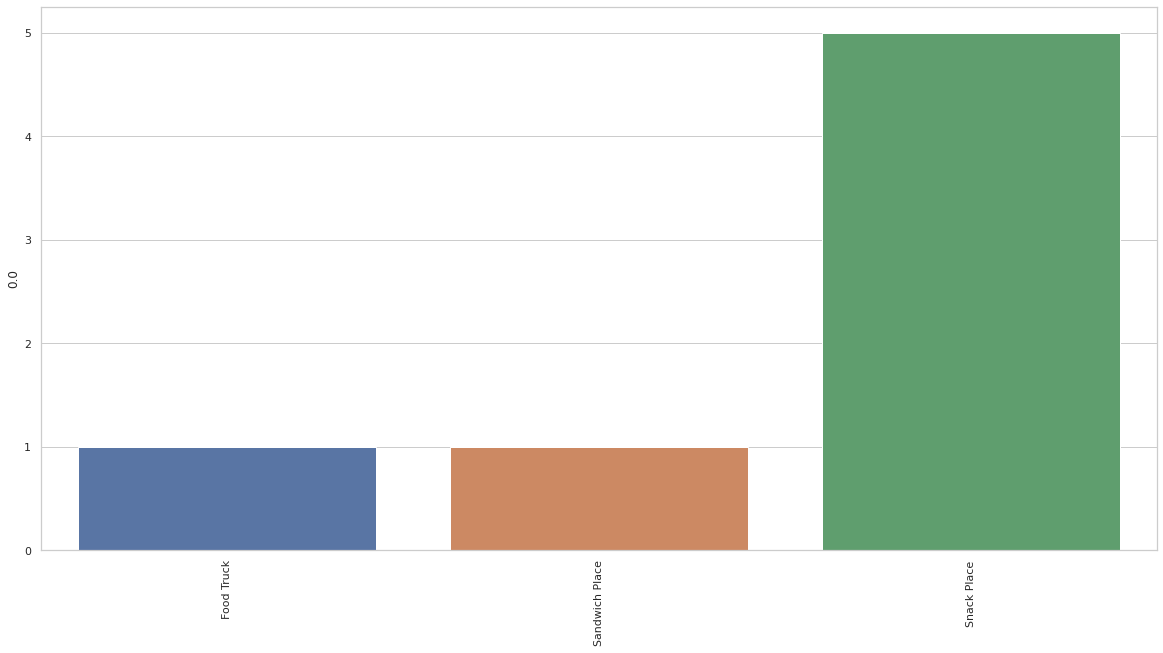

In [63]:
plot_bar(0)

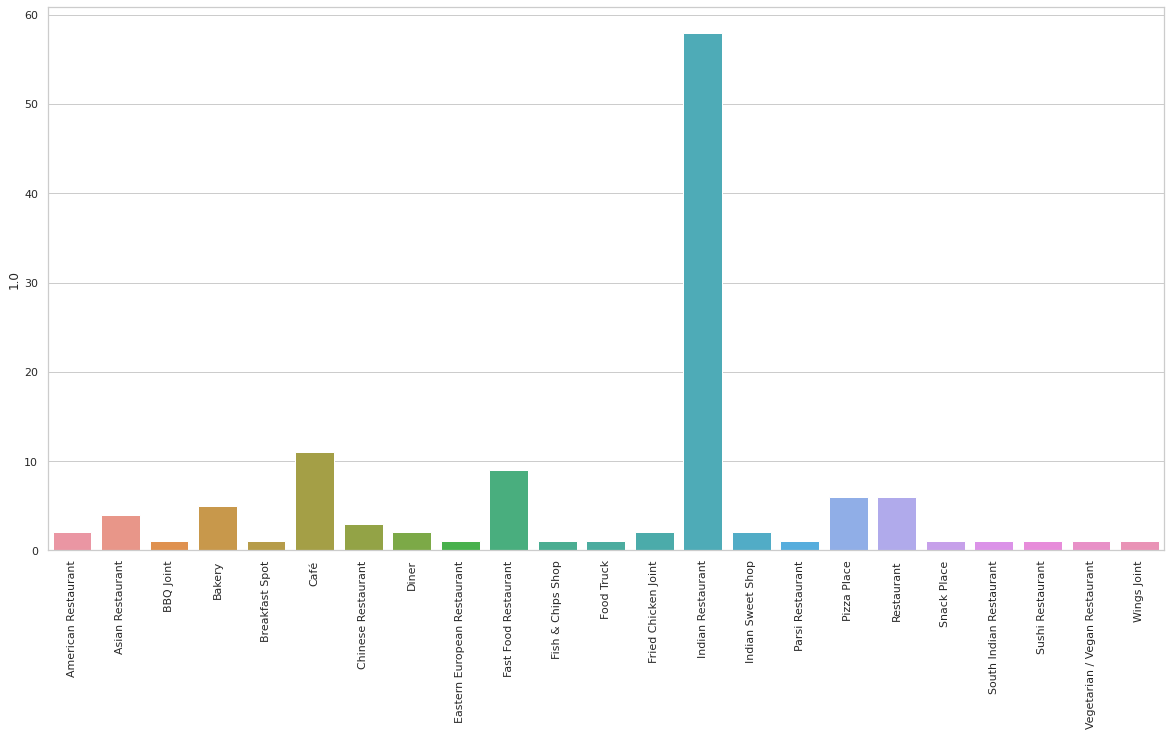

In [64]:
plot_bar(1)

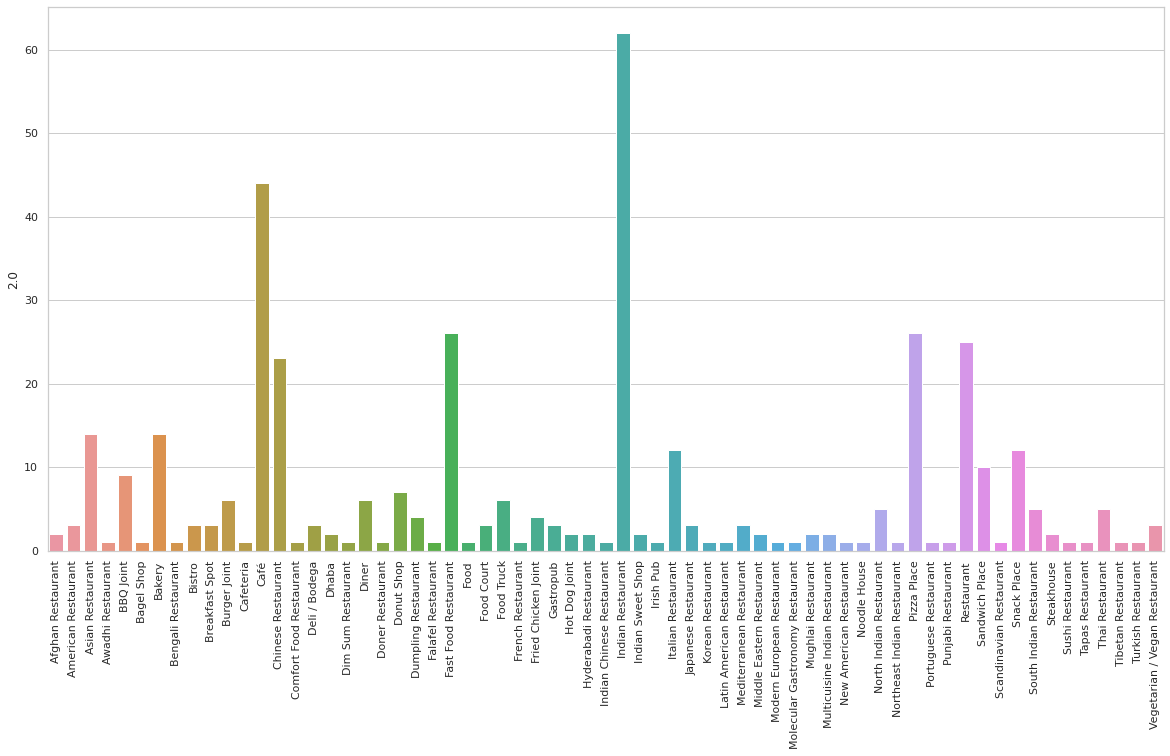

In [65]:
plot_bar(2)

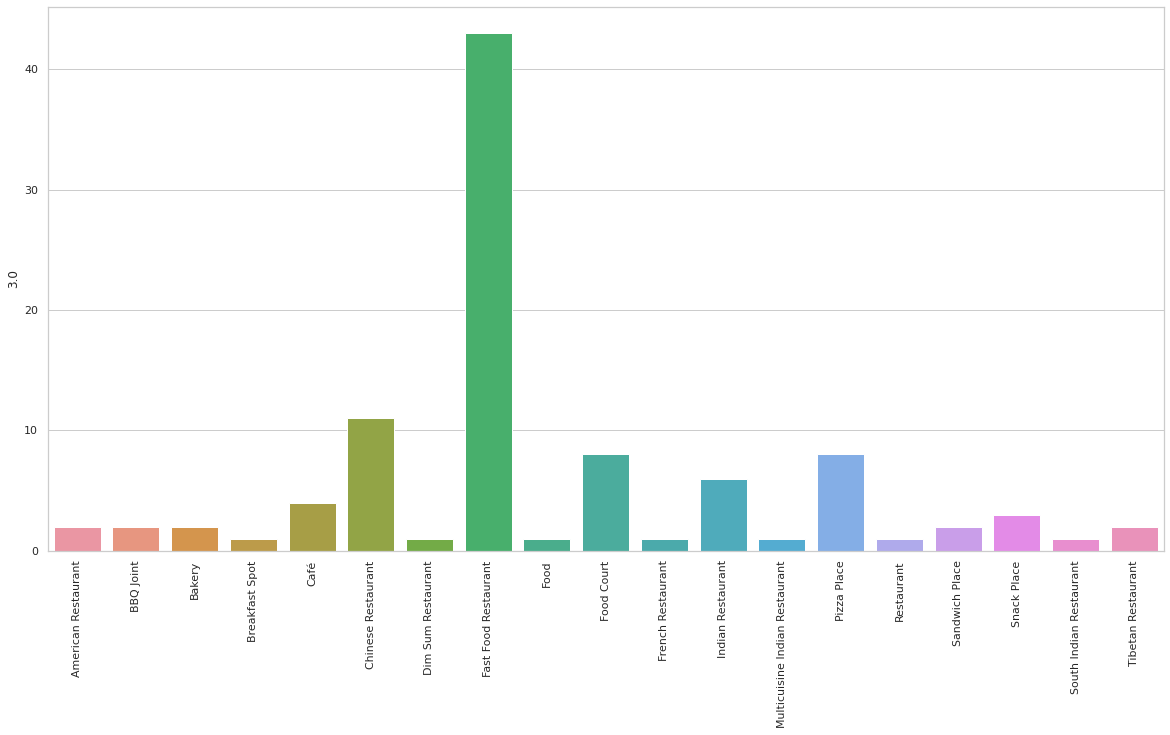

In [66]:
plot_bar(3)

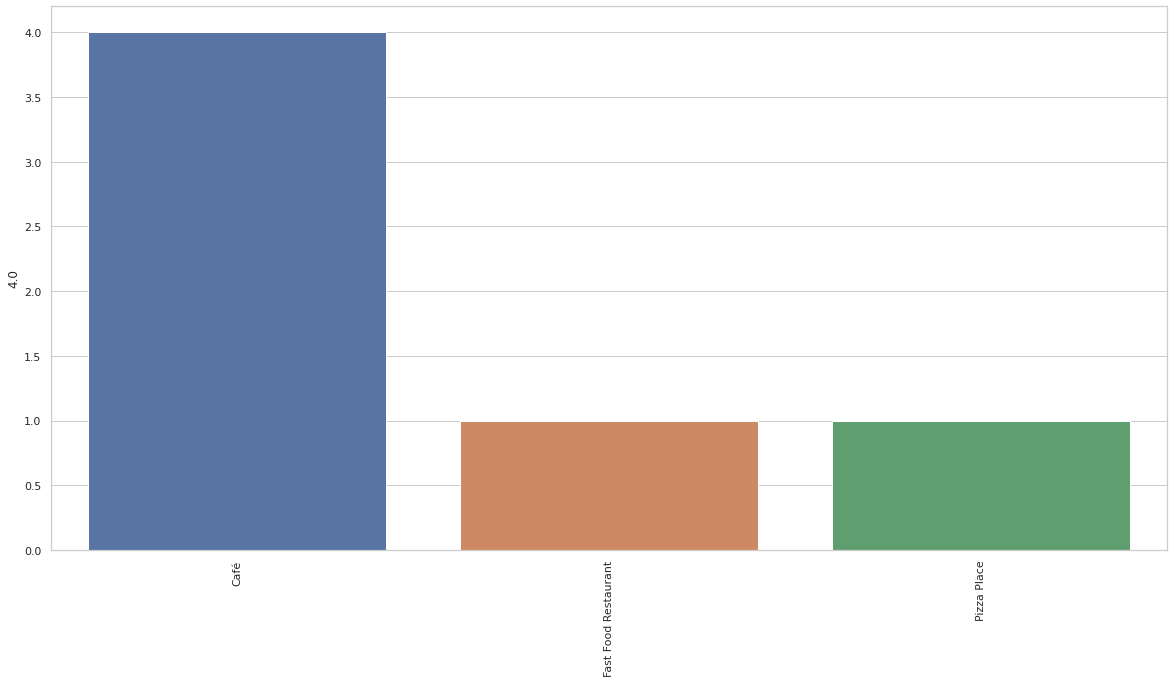

In [67]:
plot_bar(4)

Analysing the bar graphs we can clearly see that clusters 1 and 2 have a high demand for Indian Restaurants

# Recommendation

# In this section:

. we will, first, analyze the density of the Indian Restaurants in generally for each neighborhood.

. Then we will weed out the neighborhoods that in the highest 70 percentile of density

. Find out the most popular neighborhoods

. Will then try to find remaining neighborhoods that are close to them

. Provide the a detailed recommendation of top 10 neighborhoods

Now, as clusters 1 and 2 have a maximum number of Indian Restaurants, we will focus our search on neighborhoods within these two clusters.

We know that when we were clustering the neighborhoods the data used contained the mean of all types of restaurants present in the particular neighborhood. Therefore, we can say that the neighborhoods are clustered on their restaurant trends.

Now, clusters 2 and 3 may collectively have the highest number of indian restaurant but there will be some neighborhoods in these clusters which would have a demand for Indian Restaurants, as these neighborhoods are in the same cluster, but would not have enough supply

In [68]:
delhi_venues.drop('Unnamed: 0',axis=1,inplace=True)

In [69]:
forheatmap=delhi_venues.copy()
forheatmap=pd.merge(forheatmap,delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
forheatmap.drop(forheatmap[~forheatmap['Cluster Labels'].isin([1,2])].index, inplace=True)

In [70]:
forheatmap.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,1.0
5,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery,1.0
6,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner,1.0
7,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,1.0
8,Model Town,28.702714,77.193991,Pentamed Canteen,28.699220,77.191748,Snack Place,2.0


In [71]:
from folium.plugins import HeatMap

In [72]:
#heat map of all restaurants in selected Neighborhoods
res_heat = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(forheatmap['Venue Latitude'],forheatmap['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(res_heat)
for lat, lng, label in zip(forheatmap['Neighborhood Latitude'], forheatmap['Neighborhood Longitude'], forheatmap['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(res_heat)
res_heat

In [73]:
forindres = forheatmap[forheatmap['Venue Category']=='Indian Restaurant']

# heat map for Indian Restaurants in the selected Neighborhoods
res_heat_ind = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(forindres['Venue Latitude'],forindres['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(res_heat_ind)
for lat, lng, label in zip(forindres['Neighborhood Latitude'], forindres['Neighborhood Longitude'], forindres['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(res_heat_ind)
res_heat_ind

now we will remove all neighborhoods with the following conditions:

Number of Indian restaurants >30%
Number of all restaurants >60%
'%' here refers to percentile

In [74]:
count_all = forheatmap[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
target_count = int(0.6*len(count_all))
print(count_all.iloc[target_count])
count_all.drop(count_all[count_all.Venue.values>7].index,inplace=True)
count_all.columns=['all count']
count_all.head()

Venue    5
Name: Daryaganj, dtype: int64


,all count
Neighborhood,
Pragati Maidan,1
Vivek Vihar,1
Paschim Vihar,1
Timarpur,1
Gulabi Bagh,1


In [75]:
count_ind = forheatmap[forheatmap['Venue Category']=="Indian Restaurant"][['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
target_count = int(0.3*len(count_ind))
print(count_ind.iloc[target_count])
count_ind.drop(count_ind[count_ind.Venue.values>1].index,inplace=True)
count_ind.columns = ['ind count']
count_ind.head()

Venue    1
Name: Bali Nagar, dtype: int64


,ind count
Neighborhood,
Vivek Vihar,1
Munirka,1
Netaji Nagar,1
New Friends Colony,1
Nizamuddin West,1


In [76]:
lowdensity = count_all.join(count_ind)
lowdensity.index.values

array(['Pragati Maidan', 'Vivek Vihar', 'Paschim Vihar', 'Timarpur',
       'Gulabi Bagh', 'Shalimar Bagh', 'East Vinod Nagar',
       'Naveen Shahdara', 'Jor Bagh', 'New Friends Colony', 'Inderpuri',
       'Palam', 'Shahdara', 'Yamuna Vihar', 'Dhaula Kuan', 'Badarpur',
       'Sadar Bazaar', 'Khanpur', 'Tihar Village', 'Tis Hazari',
       'Jhilmil Colony', 'Laxmibai Nagar', 'Ashok Vihar', 'Kirti Nagar',
       'Netaji Nagar', 'Bali Nagar', 'Jhandewalan', 'Vikaspuri',
       'Nizamuddin West', 'Shakti Nagar', 'Pandav Nagar', 'Gulmohar Park',
       'Greater Kailash', 'Ghaziabad', 'Delhi Cantonment', 'Chattarpur',
       'Mehrauli', 'Vasundhara Enclave', 'Pitam Pura', 'Munirka',
       'Sarvodaya Enclave', 'Laxmi Nagar', 'Lodi Colony',
       'Dabri, New Delhi', 'INA Colony', 'Daryaganj', 'Hauz Khas',
       'Gurugram', 'Moti Nagar', 'Civil Lines', 'Mahipalpur',
       'Model Town', 'Old Delhi Railway Station',
       'Hazrat Nizamuddin Railway Station', 'East of Kailash'],
      dtyp

In [77]:
temp_recommend = delhiData.copy()
temp_recommend.drop(temp_recommend[~temp_recommend['Neighborhood'].isin(lowdensity.index.values)].index, inplace=True)
temp_recommend.head()

,Borough,Neighborhood,latitude,longitude
1,North West Delhi,Ashok Vihar,28.699453,77.184826
4,North West Delhi,Model Town,28.702714,77.193991
6,North West Delhi,Pitam Pura,28.703268,77.132250
7,North West Delhi,Shalimar Bagh,28.717453,77.150867
8,North Delhi,Civil Lines,28.676851,77.225030


Now, we will add the last constraint i.e the neighborhood should be close to popular neighborhoods

In [78]:
#most popular neighborhoods
top_nei = delhi_venues[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue', ascending=False).head(3).index.values
top_nei

array(['Connaught Place', 'Hauz Khas Village',
       'Indira Gandhi International Airport'], dtype=object)

In [79]:
toplatlng = delhiData[['Neighborhood','latitude','longitude']][delhiData['Neighborhood'].isin(top_nei)].reset_index()
toplatlng

,index,Neighborhood,latitude,longitude
0,34,Connaught Place,28.631383,77.219792
1,59,Hauz Khas Village,28.553855,77.194713
2,112,Indira Gandhi International Airport,28.554897,77.084675


In [80]:
from math import sin, cos, sqrt, atan2, radians

def distanceInKM(la1,lo1,la2,lo2):
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(la1)
    lon1 = radians(lo1)
    lat2 = radians(la2)
    lon2 = radians(lo2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    dis = R * c
    return round(dis,4)

print("Result:", distanceInKM(toplatlng.iloc[2]['latitude'],toplatlng.iloc[2]['longitude'],toplatlng.iloc[0]['latitude'],toplatlng.iloc[0]['longitude']))

Result: 15.7008


In [81]:
temp_recommend.reset_index(inplace=True)

In [82]:
temp_recommend.drop(columns=['index','Borough'], inplace=True)

In [83]:
temp_recommend.head()

,Neighborhood,latitude,longitude
0,Ashok Vihar,28.699453,77.184826
1,Model Town,28.702714,77.193991
2,Pitam Pura,28.703268,77.132250
3,Shalimar Bagh,28.717453,77.150867
4,Civil Lines,28.676851,77.225030


In [84]:
for i in toplatlng.index:
    temp_recommend[toplatlng.iloc[i]['Neighborhood']] = temp_recommend.apply(lambda x : distanceInKM(toplatlng.iloc[i]['latitude'],toplatlng.iloc[i]['longitude'],x['latitude'],x['longitude']),axis=1)

In [85]:
temp_recommend.head()

,Neighborhood,latitude,longitude,Connaught Place,Hauz Khas Village,Indira Gandhi International Airport
0,Ashok Vihar,28.699453,77.184826,8.3050,16.2236,18.8186
1,Model Town,28.702714,77.193991,8.3241,16.5577,19.6018
2,Pitam Pura,28.703268,77.132250,11.7016,17.7027,17.1444
3,Shalimar Bagh,28.717453,77.150867,11.7003,18.6936,19.2010
4,Civil Lines,28.676851,77.225030,5.0832,13.9974,19.2828


In [86]:
# top 5 neighborhoods near Connaught Place
neiNearCP = temp_recommend.sort_values(by=['Connaught Place']).iloc[:,:3].head().set_index('Neighborhood')
neiNearCP

,latitude,longitude
Neighborhood,,
Pragati Maidan,28.623475,77.242528
Jhandewalan,28.644319,77.199917
Daryaganj,28.646090,77.243048
Old Delhi Railway Station,28.660905,77.227715
Sadar Bazaar,28.661164,77.211712


In [87]:
# top 5 neighborhoods near Hauz Khas Village
neiNearHK = temp_recommend.sort_values(by=['Hauz Khas Village']).iloc[:,:3].head().set_index('Neighborhood')
neiNearHK

,latitude,longitude
Neighborhood,,
Hauz Khas,28.544256,77.206707
Gulmohar Park,28.557101,77.213006
Sarvodaya Enclave,28.537478,77.202089
Munirka,28.554886,77.171084
Netaji Nagar,28.573534,77.186359


In [89]:
# top 5 neighborhoods near Indira Gandhi International Airport
neiNearKV = temp_recommend.sort_values(by=['Indira Gandhi International Airport']).iloc[:,:3].head().set_index('Neighborhood')
neiNearKV

,latitude,longitude
Neighborhood,,
Palam,28.591893,77.082824
Mahipalpur,28.544485,77.125691
Delhi Cantonment,28.592593,77.122304
"Dabri, New Delhi",28.610770,77.091106
Munirka,28.554886,77.171084


In [90]:
final_recommend=neiNearCP.append(neiNearHK).append(neiNearKV).reset_index()
final_recommend.drop_duplicates(inplace=True)
final_recommend.reset_index(inplace=True)
final_recommend.drop(columns=['index'],inplace=True)
final_recommend

,Neighborhood,latitude,longitude
0,Pragati Maidan,28.623475,77.242528
1,Jhandewalan,28.644319,77.199917
2,Daryaganj,28.646090,77.243048
3,Old Delhi Railway Station,28.660905,77.227715
4,Sadar Bazaar,28.661164,77.211712
5,Hauz Khas,28.544256,77.206707
6,Gulmohar Park,28.557101,77.213006
7,Sarvodaya Enclave,28.537478,77.202089
8,Munirka,28.554886,77.171084
9,Netaji Nagar,28.573534,77.186359


In [91]:
final = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(final_recommend['latitude'], final_recommend['longitude'], final_recommend['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(final)  
    
final

# Results and Discussions

Our Analysis was done on over 129 neighborhoods, containing over 848 restaurants within 2km radius of every neighborhood. We segragated these neighborhoods on the basis of types and amounts of restaurants. Five clusters were obtained, each having a unique collection of restaurants. Since, we were focused on finding optimal neighborhoods for opening Indian restaurants, we selected cluster 2 and 3 which had the highest number of Indian restaurants. The above actions left us with the only those neighborhoods that had a shared characteristics of and that had a high demand for Indian restaurants.

Next, we plotted a heat map for analysing the density of restaurants in the remaining neighborhoods. This allowed us to select neighborhoods that had few or no Indian restaurants and were not overcrowded by other kinds of restaurants. A total of 57 neighborhoods were left. After this, we found out the top three most popular neighborhoods(namely: Canaught Place, Hauz khas Village and Indira Gandhi International Airport), and the distance of every remaining neighborhoods from all three of them. Then, we extracted top 5 closest neighborhoods from each of three most popular neighborhoods mentioned above. Taking the union of the resulting three dataset we get 11 neighborhoods that satisfy all three conditons layed out in the business problem by the customer.

The neighborhoods recommendation obtained here are not completely accurate. This is due to the limitations in the dataset used in the project. Due to lack of cross referencing sources, we may have missed a few neighborhoods from our consideration. The foursquare API does not contain, or does not rely, a comprehensive dataset about the restaurants present in delhi. Surely, in a city like Delhi with a population of over 19 million, there are much more restaurants than 848.